# Convolutional Neural Network and Computer Version

## 1. Binary Classificaton Problem

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# set the seed
tf.random.set_seed(42)

# setup the train and test directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

# import data from directories and turn it into batches
train_data = image_dataset_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               image_size=(224,224), # convert all images to 224 * 224
                                               label_mode='binary', # prediction problem type
                                               seed=42)

valid_data = image_dataset_from_directory(test_dir,
                                               batch_size=32,
                                               image_size=(224, 224),
                                               label_mode='binary',
                                               seed=42)



# create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./255), # rescale image to 0~1
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])

# compile a model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

NotFoundError: ignored

In [ ]:
model_1.summary()

### Step 1: Import and visualize the data

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2022-12-20 15:55:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.127.128, 142.251.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.5MB/s    in 3.4s    

2022-12-20 15:55:05 (30.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
!ls pizza_steak

test  train


In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [5]:
import pathlib 
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  return img

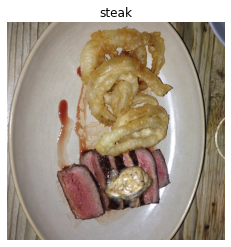

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

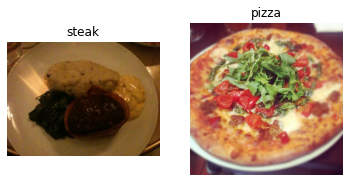

In [7]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image('pizza_steak/train/','steak')
plt.subplot(1,2,2)
pizza_img = view_random_image('pizza_steak/train/','pizza')

### Step 2: Preprocess the data

In [8]:
from tensorflow.keras import layers

In [9]:
# Define the training and test directory paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

In [10]:
# Image normalization can be done in the fitting layer 
# tf.keras.layers.Rescaling(1./255)

Resize and rescaling 

https://www.tensorflow.org/tutorials/images/data_augmentation

In [11]:
IMG_SIZE = 224

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

Data Augmentation

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

Generate a `tf.data.Dataset` from image files in a directory  https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [13]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
train_data = image_dataset_from_directory(train_dir,
                                          batch_size=32, # number of images to process at a time
                                          image_size=(224,224), # convert all images to 224 * 224
                                          label_mode='binary', # prediction problem type
                                          seed=42)

valid_data = image_dataset_from_directory(test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          label_mode='binary',
                                          seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


### Step 3: Create a model --- Start from a baseline model

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [15]:
model_4 = Sequential([
    tf.keras.layers.Rescaling(1./255),
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [16]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

### Step 4: Fit a model

In [17]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 110ms/step - loss: 0.6255 - accuracy: 0.7120 - val_loss: 0.4833 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 5s 93ms/step - loss: 0.4177 - accuracy: 0.8240 - val_loss: 0.4327 - val_accuracy: 0.7840
Epoch 3/5
47/47 [==============================] - 5s 92ms/step - loss: 0.3503 - accuracy: 0.8493 - val_loss: 0.3436 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 5s 92ms/step - loss: 0.2581 - accuracy: 0.9167 - val_loss: 0.3206 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 5s 91ms/step - loss: 0.1260 - accuracy: 0.9600 - val_loss: 0.3503 - val_accuracy: 0.8540


### Step 5: Evaluate the model

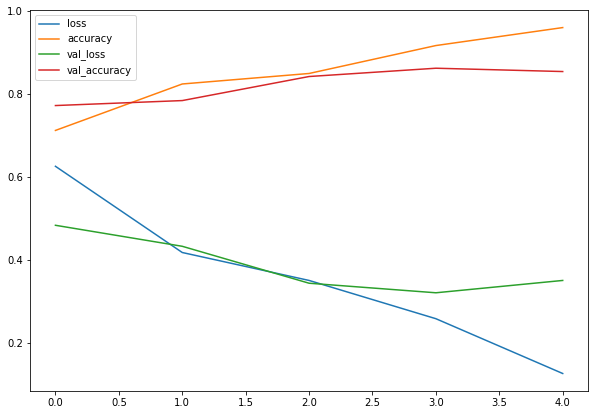

In [18]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [19]:
# Seperate the loss and accuracy to plot seperately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

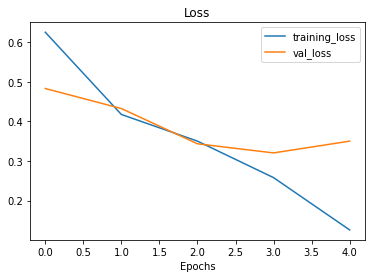

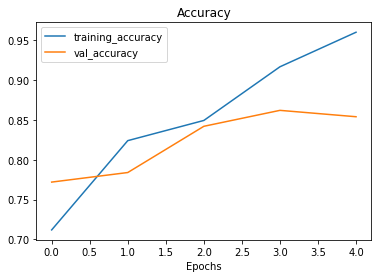

In [20]:
plot_loss_curves(history_4)

In [21]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-tr

### Step 6: Adjust the model parameters

Overfitting a larger model

In [22]:
model_5 = Sequential([
   tf.keras.layers.Rescaling(1./255),
   Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
   MaxPool2D(pool_size=2), # redue number of features
   Conv2D(10,3,activation='relu'),
   MaxPool2D(),
   Conv2D(10,3,activation='relu'),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation='sigmoid') 
])

In [23]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [24]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 5s 86ms/step - loss: 0.6140 - accuracy: 0.6480 - val_loss: 0.4766 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 4s 84ms/step - loss: 0.4913 - accuracy: 0.7687 - val_loss: 0.4492 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 5s 93ms/step - loss: 0.4407 - accuracy: 0.8067 - val_loss: 0.3836 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 4s 83ms/step - loss: 0.4149 - accuracy: 0.8147 - val_loss: 0.4057 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 4s 84ms/step - loss: 0.3929 - accuracy: 0.8313 - val_loss: 0.3578 - val_accuracy: 0.8420


In [25]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)       

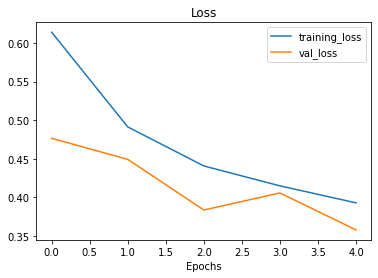

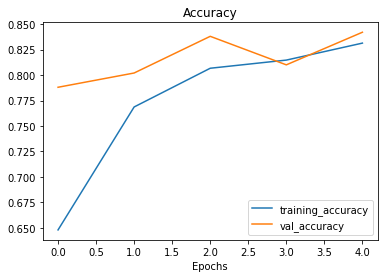

In [26]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

In [43]:
model_6 = Sequential([
    layers.Rescaling(1./255),
    data_augmentation,
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10,3, activation='relu'),
    Conv2D(10,3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 119ms/step - loss: 0.6741 - accuracy: 0.6880 - val_loss: 0.4171 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4649 - accuracy: 0.7807 - val_loss: 0.4233 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 6s 115ms/step - loss: 0.4515 - accuracy: 0.7947 - val_loss: 0.3726 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4325 - accuracy: 0.8120 - val_loss: 0.3880 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4187 - accuracy: 0.8227 - val_loss: 0.3429 - val_accuracy: 0.8740


### Step 7: Make a prediction with our model

--2022-12-20 16:04:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2022-12-20 16:04:29 (56.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



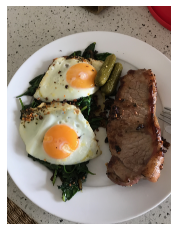

In [29]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

Reshape the image to fit in our model

In [134]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from the file and turns into the tensor,
  and reshape it into (img_shape, img_shape, color_channel)
  """

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  return img

In [37]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

Add one more dimension to mathch the shape (batch_size, 224, 224, 30

In [46]:
steak = tf.expand_dims(steak, axis=0)

In [47]:
pred = model_6.predict(steak)
pred

1/1 [==============================] - 0s 147ms/step


array([[0.6102893]], dtype=float32)

Convert prediciton probability to the class name

In [48]:
import pathlib
data_dir = pathlib.Path("pizza_steak/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

Create a function for plot and predict the class names

In [52]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img/255.)
  plt.title(f'prediction:{pred_class}');

1/1 [==============================] - 0s 18ms/step


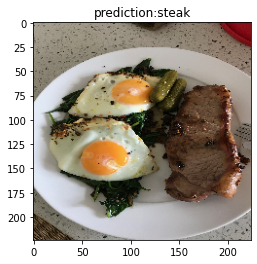

In [53]:
pred_and_plot(model_6, "03-steak.jpeg", class_names)

# 2. Multi-class Classification

### Step 1: Import data and visualize the data

In [54]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-12-20 16:35:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 74.125.143.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  34.6MB/s    in 15s     

2022-12-20 16:35:16 (32.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Check out all of the different directories and sub-directories

In [55]:
import os 
for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '10_food_classes_all_data'.
there are 10 directories and 0 images in '10_food_classes_all_data/test'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
there are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
there are 

In [106]:
train_dir1 = "10_food_classes_all_data/train/"
test_dir1 = "10_food_classes_all_data/test/"

# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir1)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


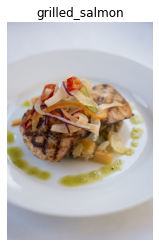

In [108]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir1,
                        target_class=random.choice(class_names)) # get a random class name

### Step 2: Preprocess the data

In [109]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
train_data = image_dataset_from_directory(train_dir1,
                                          batch_size=32, # number of images to process at a time
                                          image_size=(224,224), # convert all images to 224 * 224
                                          label_mode='categorical', # prediction problem type
                                          seed=42)

valid_data = image_dataset_from_directory(test_dir1,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          label_mode='categorical',
                                          seed=42)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Step 3: Create and fit a model

In [124]:
model_9 = Sequential([
    layers.Rescaling(1./255),
    data_augmentation,
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
235/235 [==============================] - 31s 122ms/step - loss: 2.2158 - accuracy: 0.1723 - val_loss: 2.0942 - val_accuracy: 0.2376
Epoch 2/5
235/235 [==============================] - 27s 113ms/step - loss: 2.0813 - accuracy: 0.2436 - val_loss: 1.9905 - val_accuracy: 0.2852
Epoch 3/5
235/235 [==============================] - 27s 115ms/step - loss: 1.9811 - accuracy: 0.2935 - val_loss: 1.8823 - val_accuracy: 0.3448
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 1.9334 - accuracy: 0.3225 - val_loss: 1.8659 - val_accuracy: 0.3628
Epoch 5/5
235/235 [==============================] - 27s 114ms/step - loss: 1.8823 - accuracy: 0.3517 - val_loss: 1.8308 - val_accuracy: 0.3652


### Step 4: Evaluate the model

In [111]:
# Evaluate on the test data
model_9.evaluate(valid_data)

79/79 [==============================] - 5s 60ms/step - loss: 3.5857 - accuracy: 0.2860


[3.585681200027466, 0.28600001335144043]

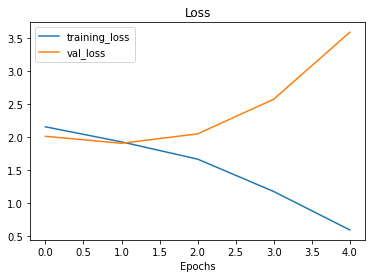

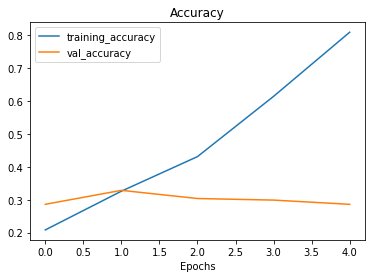

In [112]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

### Step 5: Make a prediction

In [125]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  return img

1/1 [==============================] - 0s 37ms/step


array([[0.03627617, 0.02906007, 0.16452205, 0.1954671 , 0.16519354,
        0.06106306, 0.14250879, 0.03464774, 0.08155809, 0.08970346]],
      dtype=float32)

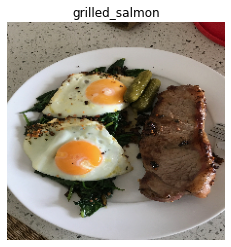

In [127]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_9.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img/255.)
plt.title(pred_class)
plt.axis(False);
pred


In [114]:
pred = model_9.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 18ms/step


array([[0.07793116, 0.04746378, 0.03671917, 0.13436884, 0.11243308,
        0.12118593, 0.05935022, 0.139821  , 0.07673386, 0.19399296]],
      dtype=float32)

In [115]:
pred.argmax()

9

In [128]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img/255.)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 16ms/step


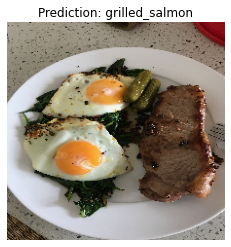

In [129]:
pred_and_plot(model_9, "03-steak.jpeg", class_names)

In [67]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 38ms/step


array([[0.13081194, 0.22363386, 0.05951845, 0.11048876, 0.12007254,
        0.01633513, 0.20409426, 0.02573824, 0.04329716, 0.06600966]],
      dtype=float32)

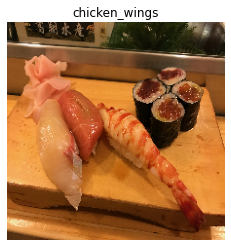

In [131]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-sushi.jpeg")

# Make a prediction
pred = model_9.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img/255.)
plt.title(pred_class)
plt.axis(False);
pred

1/1 [==============================] - 0s 18ms/step


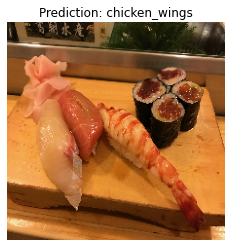

In [132]:
pred_and_plot(model_9, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 22ms/step


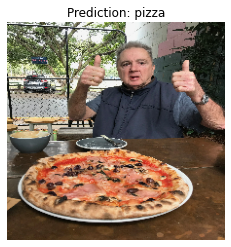

In [133]:
pred_and_plot(model_9, "03-pizza-dad.jpeg", class_names)

In [70]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

### Step 6: Save and load the model

In [135]:
model_9.save('saved_trained_model')

In [136]:
tf.keras.models.load_model('saved_trained_model')